# PROJET 7_ 02_CREATION DE FEATURES

## IMPORTS

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## DONNEES

In [3]:
os.getcwd()

'C:\\Users\\marie\\OneDrive\\OPC\\P7'

In [4]:
app_train = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/application_train.csv")

app_test = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/application_test.csv")

bureau_balance = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/bureau_balance.csv")

bureau = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/bureau.csv")

credit = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/credit_card_balance.csv")

installments = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/installments_payments.csv")

cash = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/POS_CASH_balance.csv")

prev_app = pd.read_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/previous_application.csv")

In [5]:
app_train.shape

(307511, 122)

# ANOMALIES

In [6]:
# Nous remplaçons les Nan des clients ayant une ancienneté de 365 000 jours par la valeur max de la colonne
max_employed = int(app_train.loc[app_train["DAYS_EMPLOYED"]!= 365243, ['DAYS_EMPLOYED']].min())
print(max_employed)

# Create an anomalous flag column
#app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with max dyas employed

app_train['DAYS_EMPLOYED'].replace(365243, max_employed, inplace = True)

-17912


In [7]:
app_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##  ENCODAGE DES DONNEES
Transformation des variables qualitatives en variables quantitatives via l'utilisation de :  

label encoding pour les variables qualitatives comptant moins de 2 modalités  
one hot encoding pour les autres variables qualitatives  

In [8]:
# LabelEncoder pour les colonnes dont les valeurs uniques son inférieurs ou égales à 2
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the data
            le.fit(app_train[col])
            # Transform data
            app_train[col] = le.transform(app_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [9]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

In [10]:
app_train.shape

(307511, 243)

In [11]:
app_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
app_train_copy = app_train.copy

## 3-CREATION DE FEATURES METIER (DOMAIN KNOWLEDGE FEATURES)
Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

### 1.1- DONNÉES APP_TRAIN¶

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income  
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income  
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due  
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age  
SELF_FINANCED_PERCENT: Le ratio apport initial par rapport au prix du bien  


In [13]:
app_train.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

# Self financed on goods price ratio (%)
app_train["SELF_FINANCED_PERCENT"] = (app_train["AMT_GOODS_PRICE"] - app_train["AMT_CREDIT"])/app_train["AMT_GOODS_PRICE"]*100
app_train["SELF_FINANCED_PERCENT"] = app_train["SELF_FINANCED_PERCENT"].map(lambda x: 0 if x<0 else x)


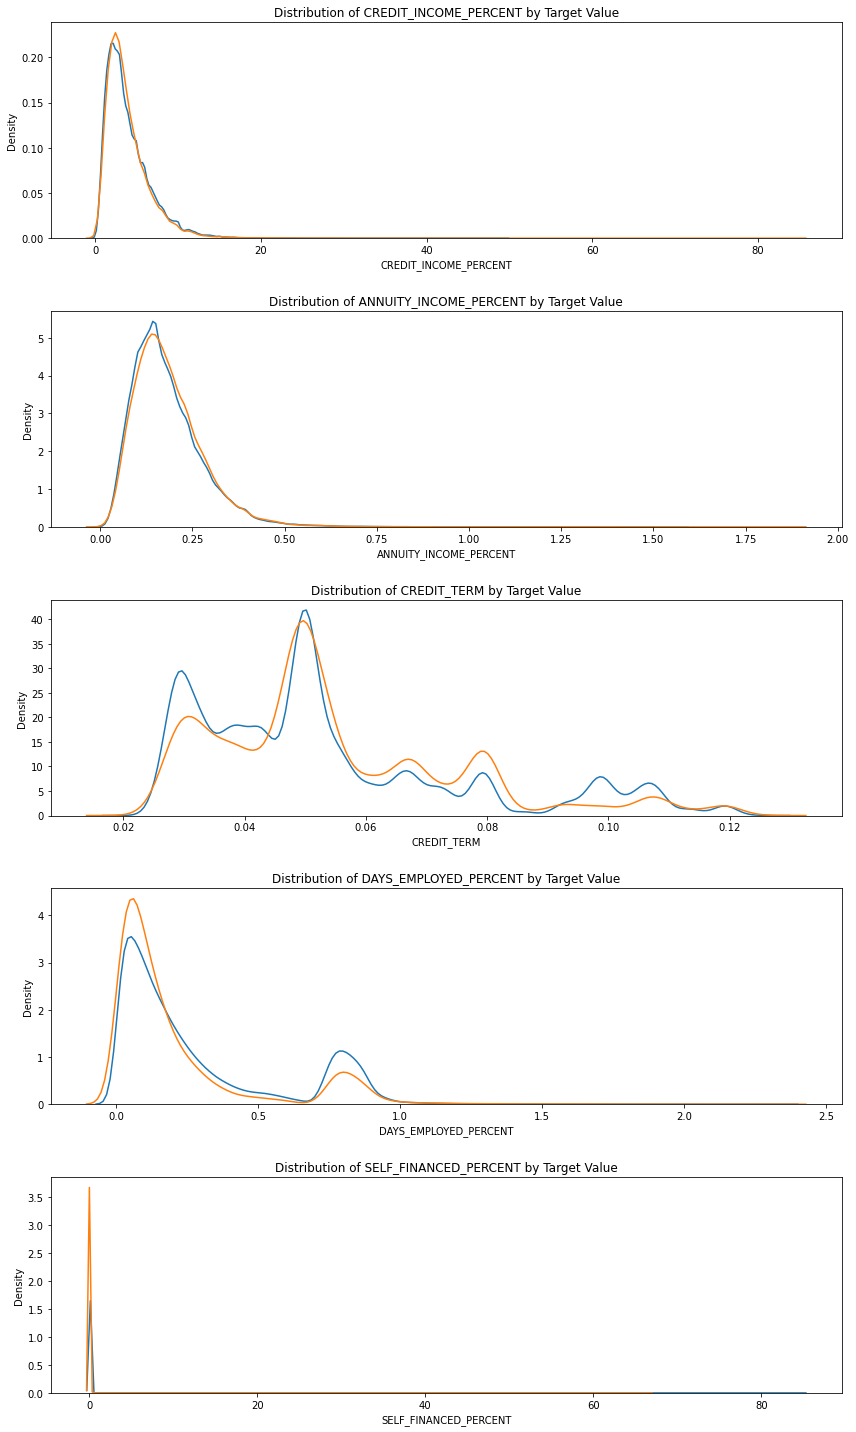

In [15]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT',"SELF_FINANCED_PERCENT" ]):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### 1.2 DONNÉES BUREAU
Création des features suivantes :
Nombre de prêts bancaires précédents  

Création des features suivantes par prêt par client :
* Pour chaque feature qualitative :  
nombre  
moyenne  
somme  
* Pour chaque feature quantitative :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [16]:
def convert_types(df, print_info = False):
    '''
        Optimized dataframe size by converting the types.
        Parameters
        --------
        - df         : pandas dataframe
                       The dataframe to optimize
        - print_info : boolean
                       Verbose flag
        Return
        --------
        df : pandas dataframe
             The optimized dataframe with converted types
    '''
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df


In [17]:
# Convert types for less memory usage
bureau = convert_types(bureau, print_info=True)

Original Memory Usage: 0.23 gb.
New Memory Usage: 0.13 gb.


In [18]:
# Creation de previous_loan_counts
previous_loan_counts = bureau.groupby('SK_ID_CURR', 
                                      as_index=False)['SK_ID_BUREAU']\
                             .count()\
                             .rename(columns = {'SK_ID_BUREAU':\
                                                'previous_loan_counts'})

# Merge de previous_loan_counts dans train on SK_ID_CURR, left
app_train = app_train.merge(previous_loan_counts, 
                            on = 'SK_ID_CURR', how = 'left')

# fillna(0) dans train
app_train['previous_loan_counts'] = app_train['previous_loan_counts']\
                                    .fillna(0)

In [19]:
def agg_categorical(df, group_var, df_name):
    '''
        Aggregates the categorical features in a child dataframe
        for each observation of the parent variable.
        
        Parameters
        --------
        - df         : pandas dataframe
                    The dataframe to calculate the value counts for.
            
        - parent_var : string
                    The variable by which to group and aggregate 
                    the dataframe. For each unique value of this variable, 
                    the final dataframe will have one row
            
        - df_name    : string
                    Variable added to the front of column names 
                    to keep track of columns
        Return
        --------
        categorical : pandas dataframe
                    A dataframe with aggregated statistics for each observation 
                    of the parent_var
                    The columns are also renamed and columns with duplicate values 
                    are removed.
    '''
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical


In [20]:
# Creation of bureau_counts containing for each possible value 
# of the qualitative features 2 new feature : count and 
# normalized count

bureau_counts = agg_categorical(bureau, 
                                     group_var = 'SK_ID_CURR', 
                                     df_name = 'bureau')

In [21]:

def agg_numeric(df, group_var, df_name):
    '''
        Aggregates the numeric values in a dataframe. This can
        be used to create features for each instance of the grouping variable.
        
        Parameters
        --------
        - df        : pandas dataframe
                    The dataframe to calculate the statistics on
        - group_var : string
                    The variable by which to group df
        - df_name   : string
                    The variable used to rename the columns
            
        Return
        --------
        - agg : pandas dataframe
                A dataframe with the statistics aggregated for
                all numeric columns. Each instance of the grouping variable will have
                the statistics (mean, min, max, sum; currently supported) calculated.
                The columns are also renamed to keep track of features created.
    '''

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns

    return agg

In [22]:
# Creation of bureau_agg containing for each possible value
# of the quantitative features 5 new features : count, max,
# mean, min and sum
 
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), 
                            group_var = 'SK_ID_CURR', 
                            df_name = 'bureau')

In [23]:
def remove_missing_columns(df, threshold = 90):
    '''
        Remove columns from dataframe with a percentage
        of missing values > threshold.
        Parameters
        --------
        - df        : pandas dataframe
                      The dataframe to remove columns from.
        - threshold : int 
                      The threshold for the % of missing values
                      for a given feature above which the feature
                      will be deleted.
        Return
        --------
        df : pandas dataframe
             The dataframe without the columns with a % of missing columns
             > threshold.
    '''

    # Calculate missing stats for train and test (remember to calculate a percent!)
    df_miss = pd.DataFrame(df.isnull().sum())
    df_miss['percent'] = 100 * df_miss[0] / len(df)
    
    # list of missing columns for train and test
    missing_columns = list(df_miss.index[df_miss['percent'] > threshold])
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' \
          % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    df = df.drop(columns = missing_columns)
    
    return df


In [24]:
# Insert computed features into training data

# Merge bureau_counts dans app_train
app_train = app_train.merge(bureau_counts, on="SK_ID_CURR", how="left")

# Merge bureau_agg dans app_train
app_train = app_train.merge(bureau_agg, on="SK_ID_CURR", how="left")

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 0 columns with greater than 90% missing values.


#### 1.3 DONNÉES BUREAU_BALANCE
Création des features suivantes par prêt par client :

* Pour chaque features qualitative :  
nombre  
moyenne  
somme  
* Features mathématiques pour chaque features quantitative par prêt par client :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [25]:
# Convert types for less memory usage
bureau_balance = convert_types(bureau_balance, print_info=True)

Original Memory Usage: 0.66 gb.
New Memory Usage: 0.35 gb.


In [26]:
# Comptage des catégories
# Counts of each type of status for each previous loan
bureau_balance_counts = agg_categorical(bureau_balance, 
                                           group_var = 'SK_ID_BUREAU', 
                                           df_name = 'bureau_balance')

# Creation de bureau_balance_agg 
# Calculate value count statistics for each `SK_ID_CURR` 
bureau_balance_agg = agg_numeric(bureau_balance, 
                                    group_var = 'SK_ID_BUREAU', 
                                    df_name = 'bureau_balance')

# Creation de bureau_by_loan
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, 
                                          right_index = True, 
                                          left_on = 'SK_ID_BUREAU', 
                                          how = 'outer')

# Merge to include the SK_ID_CURR - Possibly several rows per client
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], 
                                      on = 'SK_ID_BUREAU', 
                                      how = 'left')

# Creation de bureau_balance_by_client - One row per client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), 
                                          group_var = 'SK_ID_CURR', 
                                          df_name = 'client')

In [27]:
# Merge bureau_balance_by_client dans app_train
app_train = app_train.merge(bureau_balance_by_client, on="SK_ID_CURR", how="left")

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 0 columns with greater than 90% missing values.


#### 1.4 DONNÉES PREVIOUS APPLICATION
Création des features suivantes :  

* Features mathématiques pour chaque feature qualitative par client :  
somme  
nombre  
moyenne  
* Features mathématiques pour chaque features quantitative par client :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [28]:
# Convert types de previous
prev_app = convert_types(prev_app, print_info=True)

Original Memory Usage: 0.49 gb.
New Memory Usage: 0.18 gb.


In [29]:
# Creation de previous_agg
prev_agg = agg_numeric(prev_app, 'SK_ID_CURR', 'previous')

# Creation de previous_counts
prev_counts = agg_categorical(prev_app, 'SK_ID_CURR', 'previous')

In [30]:
# Merge previous_counts dans app_train
app_train = app_train.merge(prev_counts, on="SK_ID_CURR", how="left")

# Merge previous_agg dans app_train
app_train = app_train.merge(prev_agg, on="SK_ID_CURR", how="left")

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 6 columns with greater than 90% missing values.



### DONNÉES CASH
Création des features suivantes :  

* Features mathématiques pour chaque feature qualitative par client :  
somme  
nombre  
moyenne  
* Features mathématiques pour chaque features quantitative par client :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [31]:
# Convert types de cash
cash = convert_types(cash, print_info=True)

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.


In [32]:
def aggregate_client(df, group_vars, df_names):
    '''
        Aggregate a dataframe with data at the loan level
        at the client level
    
        Parameters
        --------
        - df : pandas dataframe
               Data at the loan level
        - group_vars : list of two strings
                       grouping variables for the loan, then the client
                    (example ['SK_ID_PREV', 'SK_ID_CURR'])
        - names : list of two strings
                   names to call the resulting columns
                   (example ['cash', 'client'])
            
        Returns
        --------
        - df_client : pandas dataframe
                      Aggregated numeric stats at the client level.
                      Each client will have a single row with all the 
                      numeric data aggregated
    '''
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, group_var = group_vars[0], df_name = df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, group_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')


        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])
        

    return df_by_client

In [33]:
# Creation de cash_by_client
cash_by_client = aggregate_client(cash, 
                                     group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], 
                                     df_names = ['cash', 'client'])

# Merge cash_by_client dans app_train
app_train = app_train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 0 columns with greater than 90% missing values.


#### 1.5 DONNÉES CARTE DE CRÉDIT
Création des features suivantes :

Features mathématiques pour chaque feature qualitative par client :  
somme  
nombre  
moyenne  
Features mathématiques pour chaque features quantitative par client :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [34]:
# Convert types de credit
credit = convert_types(credit, print_info=True)

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.


In [35]:
# Creation de credit_by_client
credit_by_client = aggregate_client(credit, 
                                       group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], 
                                       df_names = ['credit', 'client'])

# Merge credit_by_client dans app_train
app_train = app_train.merge(credit_by_client, on="SK_ID_CURR", how="left")

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 0 columns with greater than 90% missing values.


#### 1.6 DONNÉES PAIEMENT
Création des features suivantes :  

Features mathématiques pour chaque feature qualitative par client :
somme  
nombre  
moyenne  
Features mathématiques pour chaque features quantitative par client :  
nombre  
moyenne  
maximum  
minimum  
somme  

In [36]:
# Convert types de installments
installments = convert_types(installments, print_info = True)

Original Memory Usage: 0.87 gb.
New Memory Usage: 0.49 gb.


In [37]:
# Creation de installments_by_clients
installments_by_client = aggregate_client(installments, 
                                             group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], 
                                             df_names = ['installments', 'client'])

# Merge installments_by_clietns dans app_train
app_train = app_train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

# Suppression des colonnes missing
app_train = remove_missing_columns(app_train)

There are 0 columns with greater than 90% missing values.


In [38]:
app_train_domain= app_train.copy()

In [39]:
app_train_domain.shape

(307511, 1780)

## 3- POLYNOMIAL FEATURES

Les variables EXT_SOURCE_{1-3} n'ont a priori pas de sens concret. On peut imaginer que TARGET ne soit pas forcément linéairement dépendant de ces variables. Nous allons donc générer des combinaisons polynomiales de ces variables.

Une méthode simple de construction de caractéristiques est appelée polynomial features.  
Dans cette méthode, nous créons de features qui sont des puissances de features existants ainsi que des termes d'interaction entre des features existants. Par exemple, nous pouvons créer des variables EXT_SOURCE_1^2 et EXT_SOURCE_2^2 ainsi que des variables telles que EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, et ainsi de suite. Ces caractéristiques qui sont une combinaison de plusieurs variables individuelles sont appelées termes d'interaction car elles capturent les interactions entre les variables. En d'autres termes, alors que deux variables en elles-mêmes peuvent ne pas avoir une forte influence sur la cible, leur combinaison en une seule variable d'interaction peut montrer une relation avec la cible. Les termes d'interaction sont couramment utilisés dans les modèles statistiques pour capturer les effets de plusieurs variables, mais je ne les vois pas utilisés aussi souvent dans l'apprentissage automatique. Néanmoins, nous pouvons en essayer quelques-uns pour voir s'ils peuvent aider notre modèle à prédire si un client remboursera ou non un prêt.

Jake VanderPlas écrit sur les fonctionnalités polynomiales dans son excellent livre Python for Data Science pour ceux qui souhaitent plus d'informations.

Dans le code suivant, nous créons des entités polynomiales à l'aide des variables EXT_SOURCE et de la variable DAYS_BIRTH. Scikit-Learn a une classe utile appelée PolynomialFeatures qui crée les polynômes et les termes d'interaction jusqu'à un degré spécifié. Nous pouvons utiliser un degré de 3 pour voir les résultats (lorsque nous créons des caractéristiques polynomiales, nous voulons éviter d'utiliser un degré trop élevé, à la fois parce que le nombre de caractéristiques évolue de façon exponentielle avec le degré, et parce que nous pouvons rencontrer des problèmes avec surapprentissage).

In [40]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [41]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.

In [42]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [43]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [44]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)

Training data with polynomial features shape:  (307511, 1816)


In [49]:
app_train_poly.shape

(307511, 1816)

# 5- EXPORT DES DONNEES

In [45]:
# df avec les features métier
app_train.to_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/app_train_features.csv")

In [46]:
# df avec les features métier et les features polynomiales
app_train_poly.to_csv("C:\\Users\\marie\\OneDrive\\OPC\\P7/app_train_poly.csv")